<a href="https://colab.research.google.com/github/GodishalaAshwith/MachineLearningLab/blob/main/MLInternal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from sklearn.datasets import make_classification, make_regression, make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# 1. Classification Data
X_c, y_c = make_classification(n_samples=1000, n_features=20, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

# 2. Regression Data
X_r, y_r = make_regression(n_samples=500, n_features=10, noise=1.5, random_state=42)
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.3, random_state=42)

# 3. Clustering Data (Blobs & Moons)
X_blob, _ = make_blobs(n_samples=500, centers=4, random_state=42)
X_blob_scaled = StandardScaler().fit_transform(X_blob)

X_moon, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
X_moon_scaled = StandardScaler().fit_transform(X_moon)

# Save all arrays to a single file
np.savez('data/synthetic_data.npz',
         X_c_train=X_c_train, X_c_test=X_c_test, y_c_train=y_c_train, y_c_test=y_c_test,
         X_r_train=X_r_train, y_r_train=y_r_train,
         X_blob_scaled=X_blob_scaled, X_moon_scaled=X_moon_scaled)

print("Synthetic data saved to 'data/synthetic_data.npz'")

Synthetic data saved to 'data/synthetic_data.npz'


### 1. Random Forest Vs Decision Tree

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
data = np.load('data/synthetic_data.npz')
X_train, X_test, y_train, y_test = data['X_c_train'], data['X_c_test'], data['y_c_train'], data['y_c_test']

# Decision Tree
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Decision Tree Accuracy: 0.8567
Random Forest Accuracy: 0.8567


### 2. Simple Ensemble Voting Techniques

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score

# Simulated probabilities from 3 models for 5 samples
probs = np.array([[0.9, 0.4, 0.8, 0.7, 0.2],  # Model 1
                  [0.7, 0.6, 0.6, 0.5, 0.3],  # Model 2
                  [0.8, 0.3, 0.9, 0.8, 0.1]]) # Model 3
y_true = np.array([1, 0, 1, 1, 0])

# Max Voting (Hard Voting)
preds = (probs > 0.5).astype(int)
max_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)
print(f"Max Voting Accuracy:   {accuracy_score(y_true, max_vote):.2f}")

# Average Voting
avg_vote = (np.mean(probs, axis=0) > 0.5).astype(int)
print(f"Average Voting Accuracy: {accuracy_score(y_true, avg_vote):.2f}")

# Weighted Average Voting
weights = [0.4, 0.2, 0.4] # Give better models higher weights
weighted_vote = (np.average(probs, axis=0, weights=weights) > 0.5).astype(int)
print(f"Weighted Voting Accuracy: {accuracy_score(y_true, weighted_vote):.2f}")

Max Voting Accuracy:   1.00
Average Voting Accuracy: 1.00
Weighted Voting Accuracy: 1.00


### 3.Hard vs. Soft Voting Classifiers

In [6]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load data
data = np.load('data/synthetic_data.npz')
X_train, X_test, y_train, y_test = data['X_c_train'], data['X_c_test'], data['y_c_train'], data['y_c_test']

# Define base models
clf1, clf2, clf3 = LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier()

# Hard Voting
eclf_hard = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard').fit(X_train, y_train)
print(f"Hard Voting Accuracy: {eclf_hard.score(X_test, y_test):.4f}")

# Soft Voting
eclf_soft = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='soft').fit(X_train, y_train)
print(f"Soft Voting Accuracy: {eclf_soft.score(X_test, y_test):.4f}")

Hard Voting Accuracy: 0.8533
Soft Voting Accuracy: 0.8433


### 4. RandomForestRegressor with OOB Score

In [7]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load data
data = np.load('data/synthetic_data.npz')
X_train, y_train = data['X_r_train'], data['y_r_train']

# Create regressor with oob_score enabled
rf_reg = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf_reg.fit(X_train, y_train)

# The OOB score is an R^2 score calculated on unseen data during training
print(f"Out-of-Bag (OOB) Score: {rf_reg.oob_score_:.4f}")
print("Significance: A free cross-validation score without a separate validation set.")

Out-of-Bag (OOB) Score: 0.7594
Significance: A free cross-validation score without a separate validation set.


### 5. AdaBoost (Adaptive Boosting)

In [8]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

# Load data
data = np.load('data/synthetic_data.npz')
X_train, X_test, y_train, y_test = data['X_c_train'], data['X_c_test'], data['y_c_train'], data['y_c_test']

# AdaBoost uses a simple Decision Tree (a "stump") by default
ada = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

print(f"AdaBoost Accuracy: {ada.score(X_test, y_test):.4f}")

AdaBoost Accuracy: 0.8567


### 6. K-means with Elbow Method

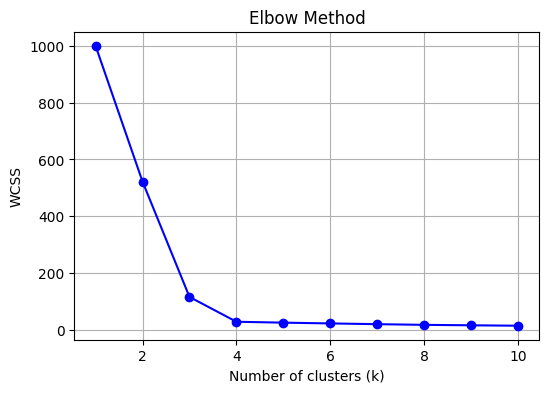

Observe the plot for the 'elbow' point (k=4), which is the optimal k.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
X_blob = np.load('data/synthetic_data.npz')['X_blob_scaled']

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_blob)
    wcss.append(kmeans.inertia_) # WCSS is the sum of squared distances

# Plot the Elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

print("Observe the plot for the 'elbow' point (k=4), which is the optimal k.")

### 7. Clustering Distance Measures

In [10]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, minkowski, jaccard
from sklearn.metrics.pairwise import cosine_similarity

vec_a = np.array([1, 2, 3, 4])
vec_b = np.array([5, 6, 7, 8])
set_a = np.array([1, 1, 0, 1, 0, 0])
set_b = np.array([1, 0, 1, 1, 0, 1])

print(f"Euclidean: {euclidean(vec_a, vec_b):.4f}")
print(f"Manhattan: {cityblock(vec_a, vec_b):.4f}")
print(f"Minkowski (p=3): {minkowski(vec_a, vec_b, p=3):.4f}")
print(f"Cosine Similarity: {cosine_similarity([vec_a], [vec_b])[0][0]:.4f}")
print(f"Jaccard Distance: {jaccard(set_a, set_b):.4f}")

Euclidean: 8.0000
Manhattan: 16.0000
Minkowski (p=3): 6.3496
Cosine Similarity: 0.9689
Jaccard Distance: 0.6000


In [11]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, minkowski, jaccard
from sklearn.metrics.pairwise import cosine_similarity

vec_a = np.array([1, 2, 3, 4])
vec_b = np.array([5, 6, 7, 8])
set_a = np.array([1, 1, 0, 1, 0, 0])
set_b = np.array([1, 0, 1, 1, 0, 1])

print(f"Euclidean: {euclidean(vec_a, vec_b):.4f}")
print(f"Manhattan: {cityblock(vec_a, vec_b):.4f}")
print(f"Minkowski (p=3): {minkowski(vec_a, vec_b, p=3):.4f}")
print(f"Cosine Similarity: {cosine_similarity([vec_a], [vec_b])[0][0]:.4f}")
print(f"Jaccard Distance: {jaccard(set_a, set_b):.4f}")

Euclidean: 8.0000
Manhattan: 16.0000
Minkowski (p=3): 6.3496
Cosine Similarity: 0.9689
Jaccard Distance: 0.6000


### 8. Hierarchical Clustering (BIRCH & Agglomerative)

In [12]:
import numpy as np
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load data
X_blob = np.load('data/synthetic_data.npz')['X_blob_scaled']

# BIRCH (good for large datasets)
birch = Birch(n_clusters=4).fit(X_blob)
print(f"BIRCH Silhouette Score: {silhouette_score(X_blob, birch.labels_):.4f}")

# Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=4).fit(X_blob)
print(f"Agglomerative Silhouette Score: {silhouette_score(X_blob, agglom.labels_):.4f}")

BIRCH Silhouette Score: 0.7979
Agglomerative Silhouette Score: 0.7979


### 9. Types of Linkages

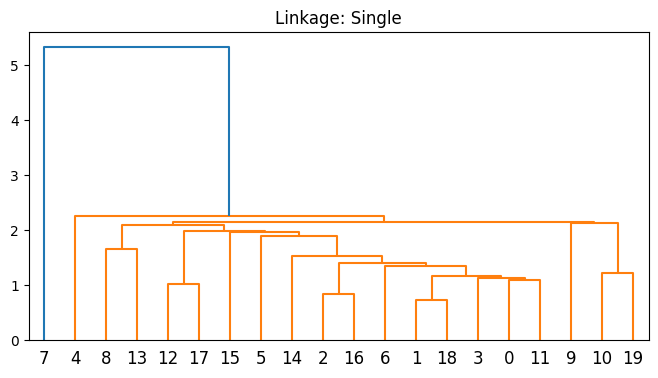

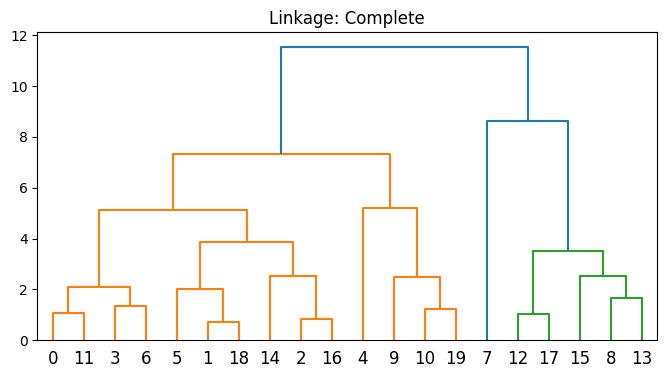

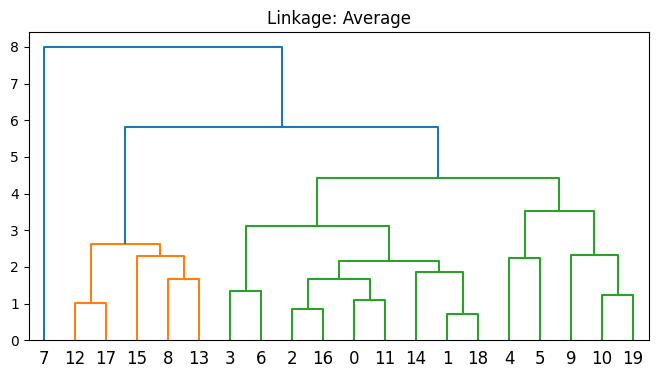

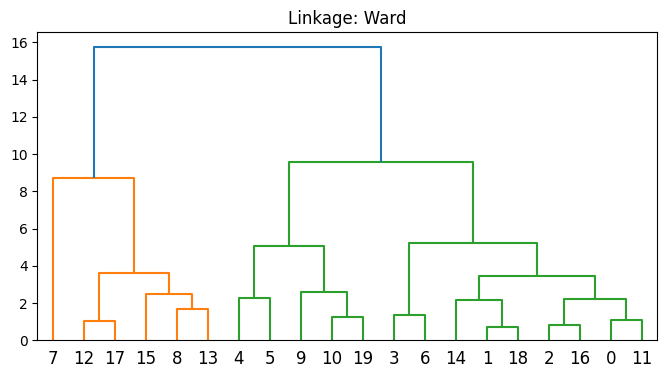

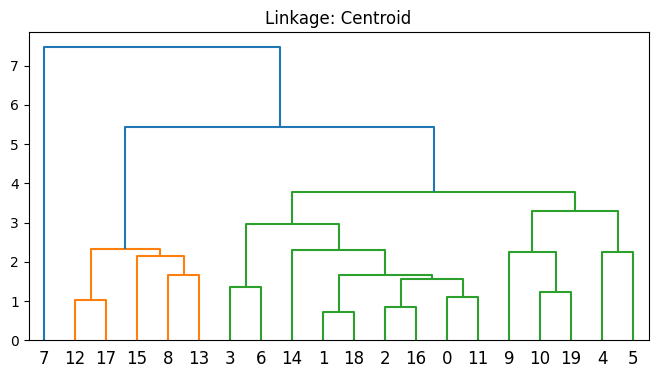

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Create simple, self-contained sample data (20 points)
np.random.seed(0)
X = np.random.rand(20, 2) * 10

# Loop through methods and plot dendrograms
for method in ['single', 'complete', 'average', 'ward', 'centroid']:
    Z = linkage(X, method=method)

    plt.figure(figsize=(8, 4))
    dendrogram(Z)
    plt.title(f"Linkage: {method.capitalize()}")
    plt.show()

### 10.DBSCAN Clustering

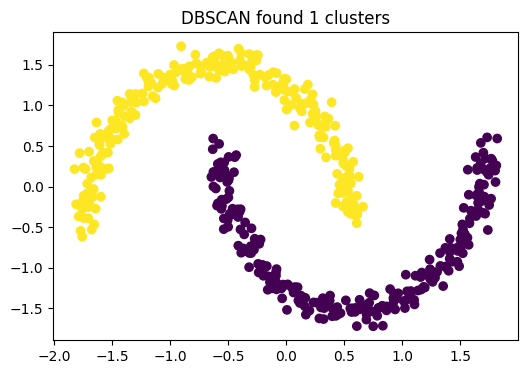

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load moon-shaped data, ideal for DBSCAN
X_moon = np.load('data/synthetic_data.npz')['X_moon_scaled']

# eps: distance, min_samples: density
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_moon)
labels = dbscan.labels_

# Plot results (-1 label = noise)
plt.figure(figsize=(6, 4))
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=labels, cmap='viridis')
plt.title(f"DBSCAN found {len(set(labels)) - 1} clusters")
plt.show()

### 11. Spectral Clustering

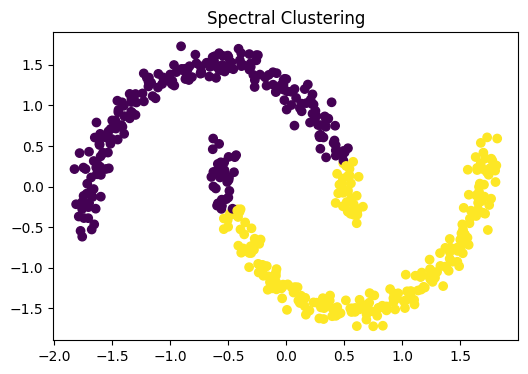

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Load moon-shaped data
X_moon = np.load('data/synthetic_data.npz')['X_moon_scaled']

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=2, random_state=42).fit(X_moon)
labels = spectral.labels_

# Plot results
plt.figure(figsize=(6, 4))
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering")
plt.show()

### 12. Perceptron for Logic Gates (AND, OR, XOR)

In [3]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Data for AND, OR, XOR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

# A simple Perceptron can solve linear problems
p = Perceptron()
print(f"AND Gate Accuracy: {p.fit(X, y_and).score(X, y_and) * 100}%")
print(f"OR Gate Accuracy:  {p.fit(X, y_or).score(X, y_or) * 100}%")

# It fails on non-linear problems
print(f"XOR Gate Accuracy (Perceptron): {p.fit(X, y_xor).score(X, y_xor) * 100}%")

# An MLP (Multi-Layer Perceptron) can solve XOR
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=1000, random_state=1)
print(f"XOR Gate Accuracy (MLP): {mlp.fit(X, y_xor).score(X, y_xor) * 100}%")

AND Gate Accuracy: 100.0%
OR Gate Accuracy:  100.0%
XOR Gate Accuracy (Perceptron): 50.0%
XOR Gate Accuracy (MLP): 100.0%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### 13. MLP with a Single Hidden Layer

In [19]:
#MLP with single hidden layer
import numpy as np

# --- Activation Function ---
def sigmoid(x):
    """Sigmoid activation function: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

# --- Neuron Class ---
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        """Compute neuron output using weights, bias, and activation function."""
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0
# The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


### 14. MLP with MNIST

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load a small subset of MNIST for speed
print("Loading MNIST data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='liac-arff')
X, y = X[:5000] / 255.0, y[:5000] # Scale pixel values to [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

print(f"MNIST Train Accuracy: {mlp.score(X_train, y_train):.4f}")
print(f"MNIST Test Accuracy:  {mlp.score(X_test, y_test):.4f}")

Loading MNIST data...
MNIST Train Accuracy: 1.0000
MNIST Test Accuracy:  0.9256


### 15.Simple Perceptron with Step Function

In [21]:
import numpy as np

def step_function(x):
    # Step activation: returns 1 if x >= 0, else 0
    return np.where(x >= 0, 1, 0)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        # Weighted sum + bias
        total = np.dot(self.weights, inputs) + self.bias
        # Apply step activation
        return step_function(total)

# Example weights and bias
weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                    # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])        # x1 = 2, x2 = 3
print(n.feedforward(x))


1


### 16.Simple Perceptron with Sigmoid Function

In [20]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))


0.9990889488055994
